# Bibliotecas

In [41]:
%run libs.py

# Ingest Data

##  DAS e Militares

In [2]:
tab_milit = pd.read_csv('data/df_cc.csv.gz', compression='gzip')
tab_milit.shape

(863, 22)

In [3]:
(tab_milit.sample(2))

,Unnamed: 0,Nome,CPF_x,ORG_EXERCICIO,ORG_LOTACAO,DESCRICAO_CARGO,Descrição do cargo emprego,Situação servidor,Denominação do órgão de atuação,UF da UPAG de vinculação,Denominação unidade organizacional,UF da Residência,Cidade da residência,Data início DAS,DL nomeação,Valor da DAS,unique_id,Id_SERVIDOR_PORTAL,MATRICULA,UF_EXERCICIO,file,presidente
343,2028,JAIR DOS SANTOS OLIVEIRA,***851627**,Comando da Marinha,Comando da Marinha,Capitao-de-Mar-e-Guerra,NaN,NOMEADO CARGO COMIS.,PRESIDENCIA DA REPUBLICA,DF,COORD-GERAL DE GEST DE INFORM FUNC/DIGEP,DF,BRASILIA,2019-03-29,PORTARIA 34/GSI DOU DE 29MAR2019,"10373,30",JAIR DOS SANTOS OLIVEIRA***851627**,7615419,010****,-1,201505,Jair Bolsonaro
279,1780,SANDRO DANIEL SOARES,***512487**,Comando do Exército,Comando do Exército,Subtenente,NaN,REQ. MILITAR F. ARM,COMANDO DO EXERCITO,DF,COORD-GERAL DE GEST DE INFORM FUNC/DIGEP,DF,BRASILIA,2019-06-05,PORTARIA 643/CC DOU DE 05JUN2019,"2956,49",SANDRO DANIEL SOARES***512487**,6010289,018****,-1,201505,Jair Bolsonaro


In [4]:
tab_milit.info();

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 863 entries, 0 to 862
Data columns (total 22 columns):
Unnamed: 0                            863 non-null int64
Nome                                  863 non-null object
CPF_x                                 863 non-null object
ORG_EXERCICIO                         863 non-null object
ORG_LOTACAO                           863 non-null object
DESCRICAO_CARGO                       863 non-null object
Descrição do cargo emprego            10 non-null object
Situação servidor                     863 non-null object
Denominação do órgão de atuação       863 non-null object
UF da UPAG de vinculação              863 non-null object
Denominação unidade organizacional    863 non-null object
UF da Residência                      863 non-null object
Cidade da residência                  863 non-null object
Data início DAS                       863 non-null object
DL nomeação                           852 non-null object
Valor da DAS               

In [5]:
def plot_col(col,title):

    # Graph
    plt.xticks(rotation=45)
    chart = (tab_milit[col].value_counts()).plot(kind='bar',
                                                 align='center',
                                                 figsize=(12, 5))

    chart.set_xticklabels(chart.get_xticklabels(),
                          rotation=45,
                          horizontalalignment='right')

    plt.title(title)
    # Amounts
    df_col = pd.DataFrame(tab_milit[col].value_counts())
    df_col['%'] = (df_col[col] / df_col[col].sum()).round(2)

    return df_col.head()

,DESCRICAO_CARGO,%
Coronel,187,0.22
Tenente-Coronel,117,0.14
Segundo-Sargento,94,0.11
Primeiro-Tenente,88,0.10
Segundo-Tenente,56,0.06


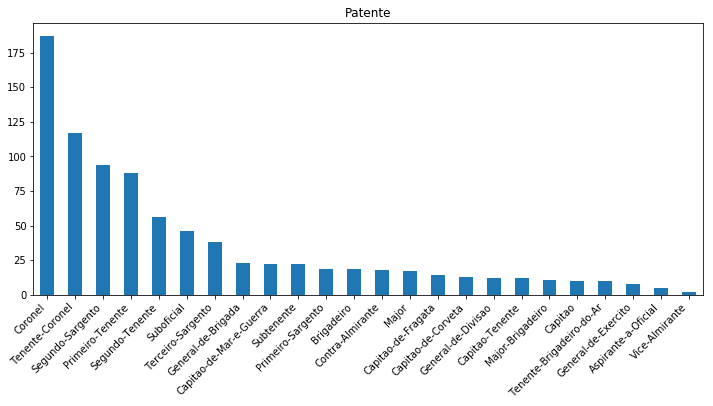

In [6]:
plot_col('DESCRICAO_CARGO', 'Patente')

,ORG_EXERCICIO,%
Comando do Exército,575,0.67
Comando da Aeronáutica,152,0.18
Comando da Marinha,136,0.16


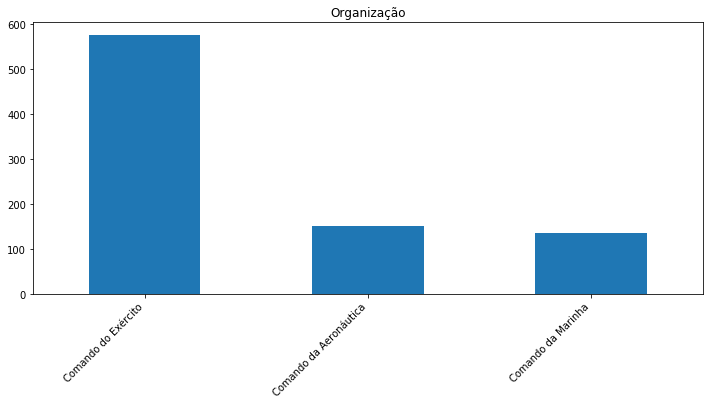

In [7]:
plot_col('ORG_EXERCICIO', 'Organização')

,Denominação do órgão de atuação,%
COMANDO DO EXERCITO,180,0.21
PRESIDENCIA DA REPUBLICA,175,0.20
COMANDO DA MARINHA,79,0.09
MINISTERIO DA DEFESA,56,0.06
MINISTERIO DA EDUCACAO,38,0.04


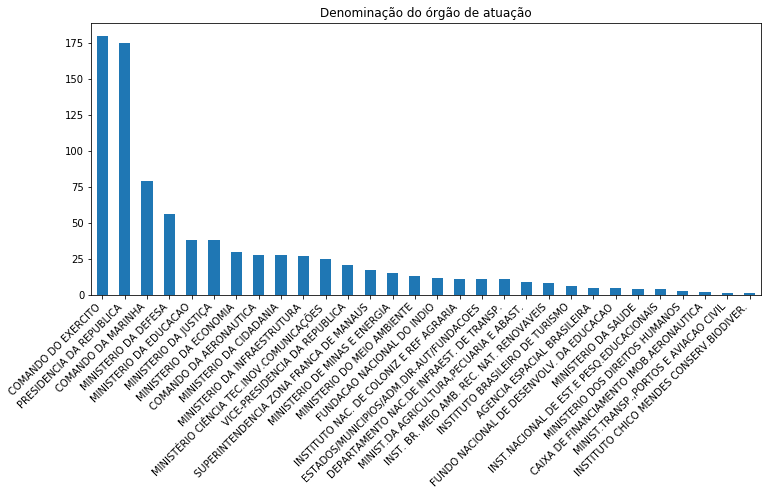

In [8]:
plot_col('Denominação do órgão de atuação', 'Denominação do órgão de atuação')

,DESCRICAO_CARGO,%
Coronel,187,0.22
Tenente-Coronel,117,0.14
Segundo-Sargento,94,0.11
Primeiro-Tenente,88,0.10
Segundo-Tenente,56,0.06


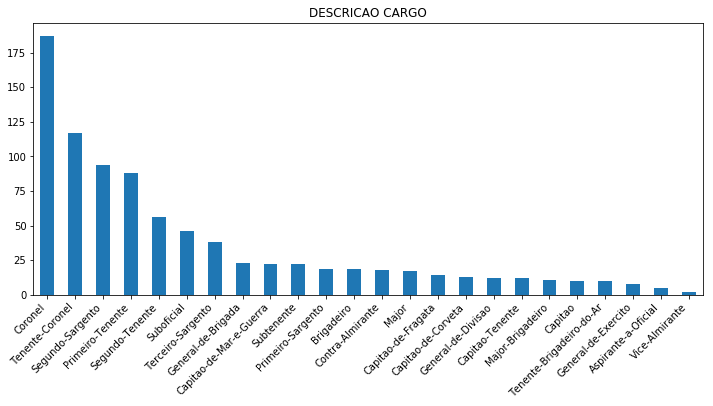

In [9]:
plot_col('DESCRICAO_CARGO', 'DESCRICAO CARGO')

In [10]:
from key_google import *

tab_milit['endereço'] = (tab_milit['Cidade da residência']+' - '+tab_milit['UF da Residência'])

for address in tab_milit['endereço']:   
    gmaps = googlemaps.Client(key=key)
    try:
        geocode_result = gmaps.geocode(address)
        lat = geocode_result[0]['geometry']['location']['lat']
        lng = geocode_result[0]['geometry']['location']['lng']
        
        tab_milit.loc[tab_milit['endereço']==address,'lat'] = lat
        tab_milit.loc[tab_milit['endereço']==address,'lng'] = lng
    except:
        pass

In [159]:
longitudes = tab_milit["lat"]
latitudes = tab_milit["lng"]
plt.figure(figsize=(8,8))
data = plot_df
data['labels_enc'] = pd.factorize(data['endereço'])[0]
scatter = plt.scatter(data['lng'], data['lat'], s=data['Nome']*100, alpha=0.4, c=data['labels_enc'], cmap="Set1")

mplleaflet.display()

In [177]:
m = folium.Map(location=[-23.53945, -46.6769765],zoom_start=4, tiles='Stamen Terrain')
tooltip = 'minha casa'
locations = plot_df[['lat', 'lng']]
locationlist = locations.values.tolist()
for point in range(0, len(locationlist)):
    folium.CircleMarker(
        location=locationlist[point], 
        tooltip=plot_df['endereço'][point],
        radius=10,
        color='grey',
        fill=True).add_to(m)
m

In [71]:

longitudes = tab_milit["lat"]
latitudes = tab_milit["lng"]
plt.figure(figsize=(8,8))
data = plot_df
data['labels_enc'] = pd.factorize(data['endereço'])[0]
plt.scatter(data['lng'], data['lat'], s=data['Nome']*100, alpha=0.4, c=data['labels_enc'], cmap="Set1")
plt.text( -170, -58,'Where people talk about #Surf\n\nData collected on twitter by @R_Graph_Gallery during 300 days\nPlot realized with Python and the Basemap library', ha='left', va='bottom', size=9, color='#555555' )
mplleaflet.display()

############

state_data = tab_milit

m = folium.Map(location=[-23.53945, -46.6769765], zoom_start=3)

folium.Choropleth(
    geo_data=state_geo,
    name='choropleth',
    data=state_data,
    columns=['State', 'Unemployment'],
    key_on='feature.id',
    fill_color='YlGn',
    fill_opacity=0.7,
    line_opacity=0.2,
    legend_name='Unemployment Rate (%)'
).add_to(m)

folium.LayerControl().add_to(m)

m

KeyError: 'State'

In [ ]:
data.sample()

In [55]:
plot_df.sample()

,endereço,Data início DAS,lat,lng,Nome
186,MANAUS - AM,2019-04-29,-3.119028,-60.021731,2


In [13]:
def plot_radar(col1, col2):
    df_relationship = tab_milit.groupby([col1,
                                         col2]).size().unstack(fill_value=0)

    categories = list(df_relationship.index)
    N = len(categories)

    angles = [n / float(N) * 2 * pi for n in range(N)]
    angles += angles[:1]

    fig = plt.figure(figsize=(10, 10))
    ax = plt.subplot(111, polar=True)

    ax.set_theta_direction(-1)
    ax.set_theta_offset(pi / 2)
    plt.xticks(angles[:-1], categories)

    for i in range(len(df_relationship.columns)):
        values = list(df_relationship.iloc[:, i])
        values += values[:1]
        ax.plot(angles,
                values,
                linewidth=1,
                linestyle='solid',
                label=df_relationship.columns[i])
        ax.fill(angles, values, alpha=0.1)

    plt.legend(loc='upper right', bbox_to_anchor=(0.1, 0.1))
    plt.show()

In [14]:
plot_radar('Orgão', 'Patente')

KeyError: 'Orgão'

In [ ]:
plot_radar('Orgão', 'Origem')

In [ ]:
plot_radar('Cargo Geral', 'Origem')

In [ ]:
plot_radar('Cargo Geral', 'Patente')

In [ ]:
counts = tab_milit.groupby(['Orgão', 'Patente']).size().unstack(fill_value=0)

fig = plt.figure(figsize=(20, 6))

ax = fig.add_subplot(111)

chart = counts.plot(ax=ax, kind='bar', stacked=True)

chart.set_xticklabels(chart.get_xticklabels(),
                      rotation=45,
                      horizontalalignment='right')

ax.yaxis.grid(True)

ax.set_axisbelow(True)

plt.show()

In [ ]:
N = len(list(counts.sum(axis=1)))
theta = np.linspace(0.0, 2 * np.pi, N, endpoint=False)
radii = list(counts.sum(axis=1))
width = 2 * np.pi / N
colors = plt.cm.hsv(theta / 2 / np.pi)

ax = plt.subplot(111, projection='polar')
bars = ax.bar(theta, radii, width=width, bottom=0, color=colors)

plt.show()

In [ ]:
"""
@file
@brief Convert R into Python
"""
from antlr4 import ParseTreeWalker
from pyquickhelper.pycode import remove_extra_spaces_and_pep8
from .RParser import RParser
from .RLexer import RLexer
from .antlr_grammar_use import parse_code
from .rconverterListener import TreeStringListener


def r2python(code: str, pep8=False, fLOG=None) -> str:
    """
    Converts a R script into Python.
    @param      code        R string
    @param      pep8        modify the output to be compliant with pep8
    @param      fLOG        logging function
    @return                 Python string
    .. _code-r2python:
    The function uses a customized R grammar implemented with Antlr4.
    Formula becomes strings. They should be handled with
    `patsy <http://patsy.readthedocs.io/en/latest/>`_.
    .. exref::
        :title: Convert R into Python
        .. runpython::
            :showcode:
            rscript = '''
                nb=function(y=1930){
                debut=1816
                MatDFemale=matrix(D$Female,nrow=111)
                colnames(MatDFemale)=(debut+0):198
                cly=(y-debut+1):111
                deces=diag(MatDFemale[:,cly[cly%in%1:199]])
                return(c(B$Female[B$Year==y],deces))}
                '''
            from pyensae.languages import r2python
            print(r2python(rscript, pep8=True))
    Some patterns are not well migrated such expression ``a:b`` into ``range(a,b)``.
    The grammar could be improved to detect the beginning of the expression but
    for now, if the function fails to do the conversion, ``a:b`` must be written
    into ``(a):b``. The same trick is sometimes needed for other patterns
    such as the operator ``%in%`` which is converted into an intersection
    of two sets.
    Kwonws bugs:
    * ``} else {`` needs to be replaced by ``} EOL else {``
    * comment added at the end of line must be followed by an empty line
    * ``m[,1]`` must be replaced by ``M[:,1]``
    * formula ``~.`` is not translated
    * ``%<%`` cannot be followed by an empty line
    """
    if fLOG:
        fLOG("[r2python] parse ", len(code), "bytes")
    parser = parse_code(code, RParser, RLexer)
    if fLOG:
        fLOG("[r2python] parse continue")
    parsed = parser.parse()
    if fLOG:
        fLOG("[r2python] listen")
    listen = TreeStringListener(parsed, fLOG=fLOG)
    walker = ParseTreeWalker()
    if fLOG:
        fLOG("[r2python] walk")
    walker.walk(listen, parsed)
    if fLOG:
        fLOG("[r2python] get code")
    code = listen.get_python()
    if pep8:
        if fLOG:
            fLOG("[r2python] pep8")
        code = remove_extra_spaces_and_pep8(code, aggressive=True)
    return code

In [ ]:
# !python untitled.py
from untitled import *

In [ ]:
lng_home